## Notebook containing code used for manuscript supplementary figure 1

## Packages

In [2]:
import warnings
import anndata as ad
import spateo as st
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context="paper", style="ticks", font_scale=1)
warnings.filterwarnings('ignore')

## Figure S1c- Sequencing differences among seven 3D spatial transcriptomics datasets

E95_cells_data = pd.DataFrame(E95_adata.obs)
 
E95_cells_data.to_csv(os.path.join(img_outdir, f"mouse_E9.5_sc_final_cells_data.csv"), sep="\t")

In [3]:
sample_ids = ["Human-CS8-st", "Mouse-E8.5-sl", "Mouse-E9.0-sl", "Mouse-E9.5-st", "Mouse-E11.5-st", 'Droso-S11-st', 'Droso-S13-st']
cells_data_dict = {
        "Human-CS8-st": pd.read_csv(f"/media/pc001/Yao/Projects/Project_spateo/mouse_embryo/CS8_st_image/human_CS8_st_final_cells_statistics.csv", index_col=0, sep="\t"),
        "Mouse-E8.5-sl": pd.read_csv(f"/media/pc001/Yao/Projects/Project_spateo/mouse_embryo/E8.5_sl_image/mouse_E8.5_sl_final_cells_statistics.csv", index_col=0, sep="\t"),
        "Mouse-E9.0-sl": pd.read_csv(f"/media/pc001/Yao/Projects/Project_spateo/mouse_embryo/E9.0_sl_image/mouse_E9.0_sl_final_cells_statistics.csv", index_col=0, sep="\t"),
        "Mouse-E9.5-st": pd.read_csv(f"/media/pc001/Yao/Projects/Project_spateo/mouse_embryo/E9.5_st_image/mouse_E9.5_st_final_cells_statistics.csv", index_col=0, sep="\t"),
        "Mouse-E11.5-st": pd.read_csv(f"/media/pc001/Yao/Projects/Project_spateo/mouse_embryo/E11.5_st_image/mouse_E11.5_st_final_cells_statistics.csv", index_col=0, sep="\t"),
        "Droso-S11-st": pd.read_csv(f"/media/pc001/Yao/Projects/Project_spateo/mouse_embryo/S11_st_image/droso_S11_st_final_cells_statistics.csv", index_col=0, sep="\t"),
        "Droso-S13-st": pd.read_csv(f"/media/pc001/Yao/Projects/Project_spateo/mouse_embryo/S13_st_image/droso_S13_st_final_cells_statistics.csv", index_col=0, sep="\t"),
}
cells_data_dict

{'Human-CS8-st':        subcluster_value       subcluster  n_genes_by_counts  total_counts
 0                    11            Ery-2                975        2607.0
 1                    11            Ery-2                677        1731.0
 2                    10            Ery-1                940        2482.0
 3                     6  Definitive.HSPC               1581        5166.0
 4                     6  Definitive.HSPC               1369        4164.0
 ...                 ...              ...                ...           ...
 38557                32        YS.Endo-4                924        1836.0
 38558                32        YS.Endo-4                954        1897.0
 38559                10            Ery-1                486         829.0
 38560                31        YS.Endo-3                760        1437.0
 38561                32        YS.Endo-4                827        1587.0
 
 [38484 rows x 4 columns],
 'Mouse-E8.5-sl':                                      

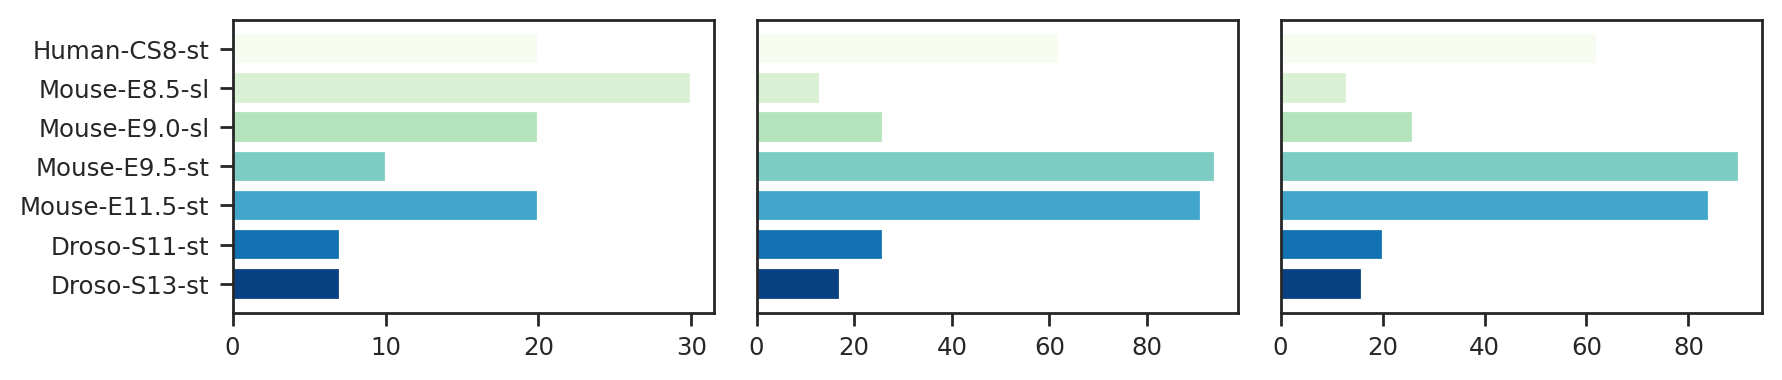

In [4]:
interval_dict = {"Human-CS8-st": 20, "Mouse-E8.5-sl": 30, "Mouse-E9.0-sl": 20, "Mouse-E9.5-st": 10,
                 "Mouse-E11.5-st": 20, "Droso-S11-st": 7, "Droso-S13-st": 7}
seq_section_dict = {"Human-CS8-st": 62, "Mouse-E8.5-sl": 13, "Mouse-E9.0-sl": 26, "Mouse-E9.5-st": 94,
                    "Mouse-E11.5-st": 91, "Droso-S11-st": 26, "Droso-S13-st": 17}
hq_section_dict = {"Human-CS8-st": 62, "Mouse-E8.5-sl": 13, "Mouse-E9.0-sl": 26, "Mouse-E9.5-st": 90,
                   "Mouse-E11.5-st": 84, "Droso-S11-st": 20, "Droso-S13-st": 16}

lscmap = mpl.cm.get_cmap("GnBu_r") 
hex_list = [mpl.colors.to_hex(lscmap(i)) for i in np.linspace(0, 1, 7)]

fig, axes = plt.subplots(1, 3, figsize=(9, 2))
for i, _dict in enumerate([interval_dict, seq_section_dict, hq_section_dict]):
        keys = [k for k in _dict.keys()]
        values = [v for v in _dict.values()]
        keys.reverse(), values.reverse()
        axes[i].barh(keys, values, label=keys, color=hex_list)
        if i != 0:
            axes[i].set_yticks([])
fig.tight_layout()
fig.show()

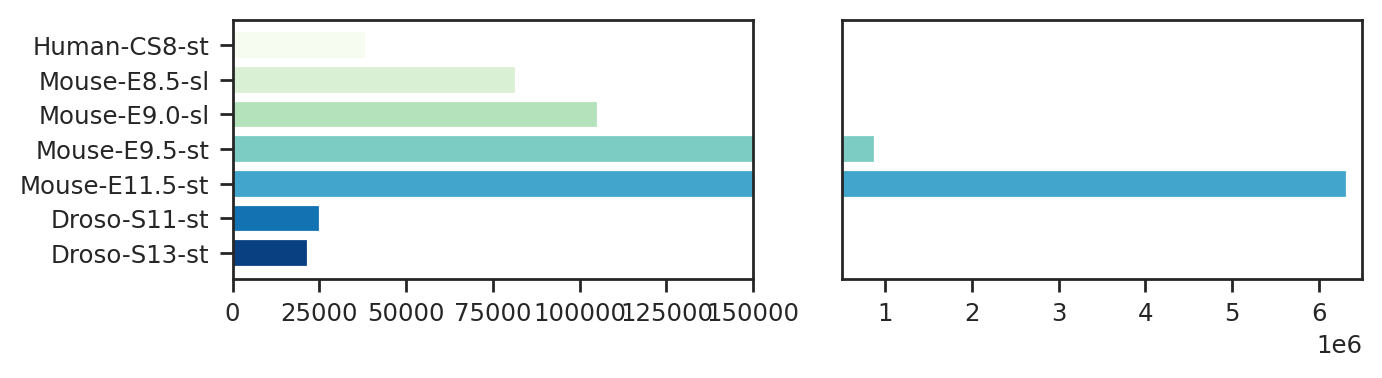

In [5]:
cell_num_dict = {sample_id: cells_data_dict[sample_id].shape[0]  for sample_id in sample_ids}

fig, axes = plt.subplots(1, 2, figsize=(7, 2))
keys = [k for k in cell_num_dict.keys()]
values = [v for v in cell_num_dict.values()]
keys.reverse(), values.reverse()
axes[0].barh(keys, values, label=keys, color=hex_list)
axes[0].set_xlim(0, 1.5e5)
axes[1].barh(keys, values, label=keys, color=hex_list)
axes[1].set_xlim(0.5e6, 6.5e6)
axes[1].set_yticks([])
fig.tight_layout()
fig.show()


Human-CS8-st: 1189.0
Mouse-E8.5-sl: 1287.0
Mouse-E9.0-sl: 501.0
Mouse-E9.5-st: 291.0
Mouse-E11.5-st: 240.0
Droso-S11-st: 157.0
Droso-S13-st: 156.0


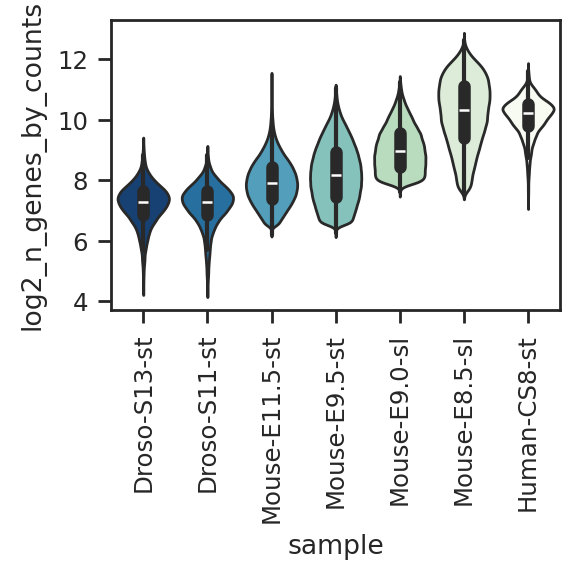

In [6]:
metric = "n_genes_by_counts"
metric_data = pd.DataFrame(columns=[metric, f"log2_{metric}", "sample"])
for si in sample_ids:
    _data = pd.DataFrame(cells_data_dict[si][metric].values, columns=[metric])
    _data[f"log2_{metric}"], _data["sample"] = np.log2(_data[metric]), si
    print(f"{si}: {_data[metric].median()}")
    
    metric_data = pd.concat([metric_data, _data], axis=0)

order = [i for i in cells_data_dict.keys()]
order.reverse()
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
sns.violinplot(metric_data, x="sample", y=f"log2_{metric}", order=order, ax=ax, palette=hex_list)
ax.tick_params(axis='x', labelrotation=90)
fig.tight_layout()
fig.show()

## Figure S1d- Comparison for mouse E9.5 whole embryo Stereo-seq datasets with the scRNA-seq reference. 

In [7]:
E95_groups_colors = {
    'CNS_neurons': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
    'Endothelium': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
    'Mesoderm': (1.0, 0.4980392156862745, 0.054901960784313725),
    'Neuroectoderm_and_glia': (1.0, 0.7333333333333333, 0.47058823529411764),
    'Epithelial_cells': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
    'Primitive_erythroid': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
    'Neural_crest_PNS_glia': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
    'Neural_crest_PNS_neurons': (1.0, 0.596078431372549, 0.5882352941176471),
    'Cardiomyocytes': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
    'Hepatocytes': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
}
E95_cellgroups = [i for i in E95_groups_colors.keys()]

E95_sc_cells_data = pd.read_csv(f"/media/pc001/Yao/Projects/Project_spateo/mouse_embryo/E9.5_sc_image/mouse_E9.5_sc_final_cells_data.csv", index_col=0, sep="\t")
E95_sc_data = pd.DataFrame(E95_sc_cells_data["major_trajectory"].value_counts() / E95_sc_cells_data.shape[0]).loc[E95_cellgroups, :]
E95_sc_data.columns = ["fraction"]
E95_sc_data["cellgroups"] = E95_sc_data.index

E95_st_cells_data = pd.read_csv(f"/media/pc001/Yao/Projects/Project_spateo/mouse_embryo/E9.5_st_image/mouse_E9.5_st_final_cells_data.csv", index_col=0, sep="\t")
E95_st_data = pd.DataFrame(E95_st_cells_data["sc_ref_groups"].value_counts() / E95_st_cells_data.shape[0]).loc[E95_cellgroups, :]
E95_st_data.columns = ["fraction"]
E95_st_data["cellgroups"] = E95_st_data.index
E95_sc_data, E95_st_data

(                          fraction                cellgroups
 CNS_neurons               0.020128               CNS_neurons
 Endothelium               0.045541               Endothelium
 Mesoderm                  0.447131                  Mesoderm
 Neuroectoderm_and_glia    0.324490    Neuroectoderm_and_glia
 Epithelial_cells          0.087672          Epithelial_cells
 Primitive_erythroid       0.028716       Primitive_erythroid
 Neural_crest_PNS_glia     0.021107     Neural_crest_PNS_glia
 Neural_crest_PNS_neurons  0.006938  Neural_crest_PNS_neurons
 Cardiomyocytes            0.016141            Cardiomyocytes
 Hepatocytes               0.002135               Hepatocytes,
                           fraction                cellgroups
 CNS_neurons               0.026196               CNS_neurons
 Endothelium               0.056468               Endothelium
 Mesoderm                  0.466379                  Mesoderm
 Neuroectoderm_and_glia    0.138359    Neuroectoderm_and_glia
 Epithe

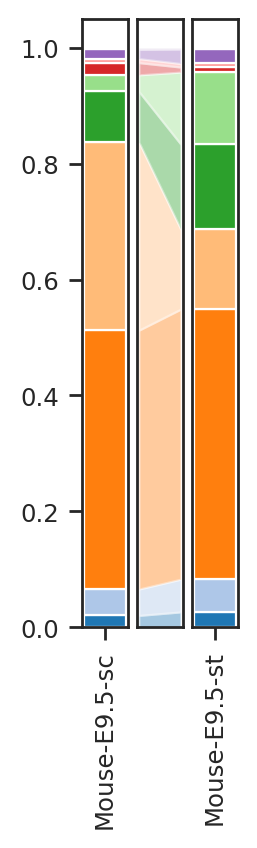

In [8]:
sns.set_theme(context="paper", style="ticks", font_scale=1)
fig, axes = plt.subplots(1, 3, figsize=(1, 4))

starts = 0
for i, ct in enumerate(E95_cellgroups):
    axes[0].bar(0, E95_sc_data.loc[ct, "fraction"], bottom=starts , width=1, color=E95_groups_colors[ct])
    starts = starts + E95_sc_data.loc[ct, "fraction"]
axes[0].set_xticks([0], ["Mouse-E9.5-sc"])
axes[0].tick_params(axis='x', labelrotation=90)

population_by_continent = {cg: [E95_sc_data.loc[cg, "fraction"], E95_st_data.loc[cg, "fraction"]] for cg in E95_cellgroups}
axes[1].stackplot([-0.5, 0.5], population_by_continent.values(),labels=population_by_continent.keys(), alpha=0.4, colors=[E95_groups_colors[i] for i in population_by_continent.keys()])
axes[1].set_xticks([])
axes[1].tick_params(axis='x', labelrotation=90)
axes[1].set_yticks([])

starts = 0
for i, ct in enumerate(E95_cellgroups):
    axes[2].bar(0, E95_st_data.loc[ct, "fraction"], bottom=starts, width=1, color=E95_groups_colors[ct])
    starts = starts + E95_st_data.loc[ct, "fraction"]
axes[2].set_xticks([0], ["Mouse-E9.5-st"])
axes[2].tick_params(axis='x', labelrotation=90)
axes[2].set_yticks([])
fig.show()

CNS_neurons: 1314.0
Endothelium: 1642.0
Mesoderm: 1498.0
Neuroectoderm_and_glia: 1473.0
Epithelial_cells: 1590.0
Primitive_erythroid: 1037.0
Neural_crest_PNS_glia: 1684.0
Neural_crest_PNS_neurons: 1459.0
Cardiomyocytes: 1692.0
Hepatocytes: 1875.0


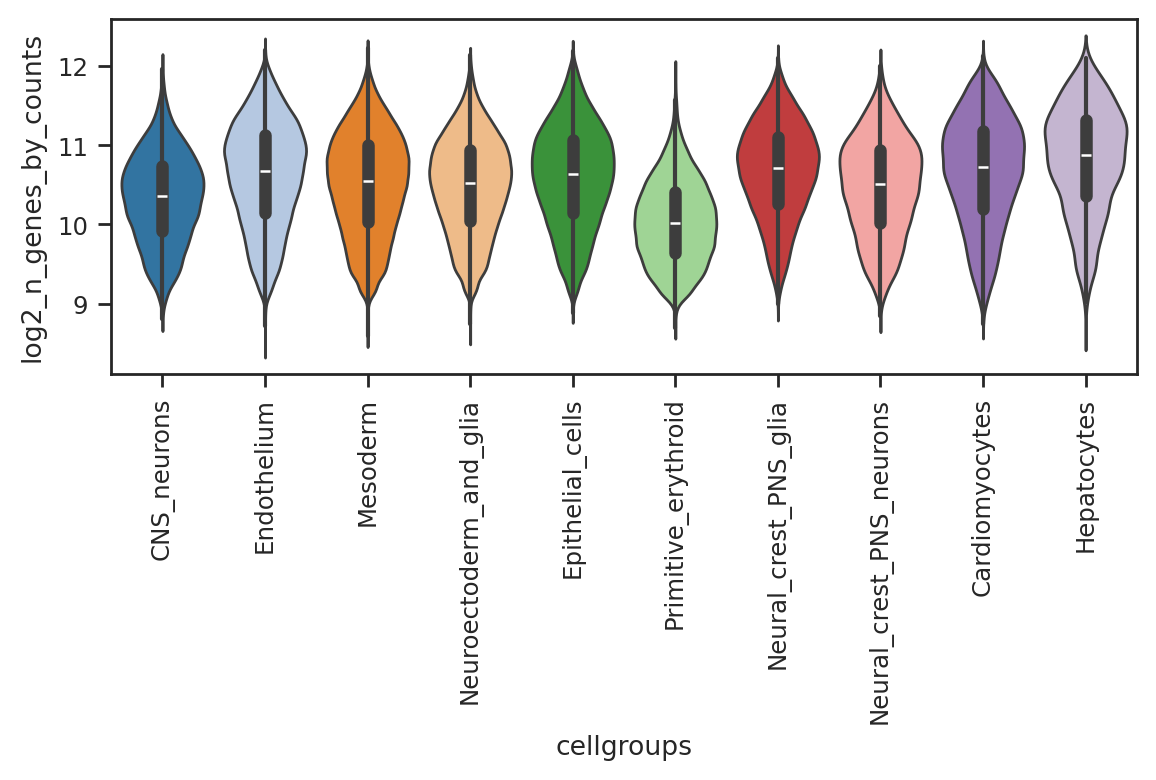

In [9]:
metric = "n_genes_by_counts"
metric_data = pd.DataFrame(columns=[metric, f"log2_{metric}", "cellgroups"])
for cg in E95_cellgroups:
    _data = E95_sc_cells_data.loc[E95_sc_cells_data['major_trajectory'] == cg, :]
    _data = pd.DataFrame(_data[metric].values, columns=[metric])
    _data[f"log2_{metric}"], _data["cellgroups"] = np.log2(_data[metric]), cg
    print(f"{cg}: {_data[metric].median()}")
    
    metric_data = pd.concat([metric_data, _data], axis=0)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.violinplot(metric_data, x="cellgroups", y=f"log2_{metric}", order=E95_cellgroups, ax=ax, palette=E95_groups_colors)
ax.tick_params(axis='x', labelrotation=90)
fig.tight_layout()
fig.show()

CNS_neurons: 282.0
Endothelium: 321.0
Mesoderm: 277.0
Neuroectoderm_and_glia: 429.0
Epithelial_cells: 264.0
Primitive_erythroid: 271.0
Neural_crest_PNS_glia: 291.0
Neural_crest_PNS_neurons: 263.0
Cardiomyocytes: 281.0
Hepatocytes: 396.0


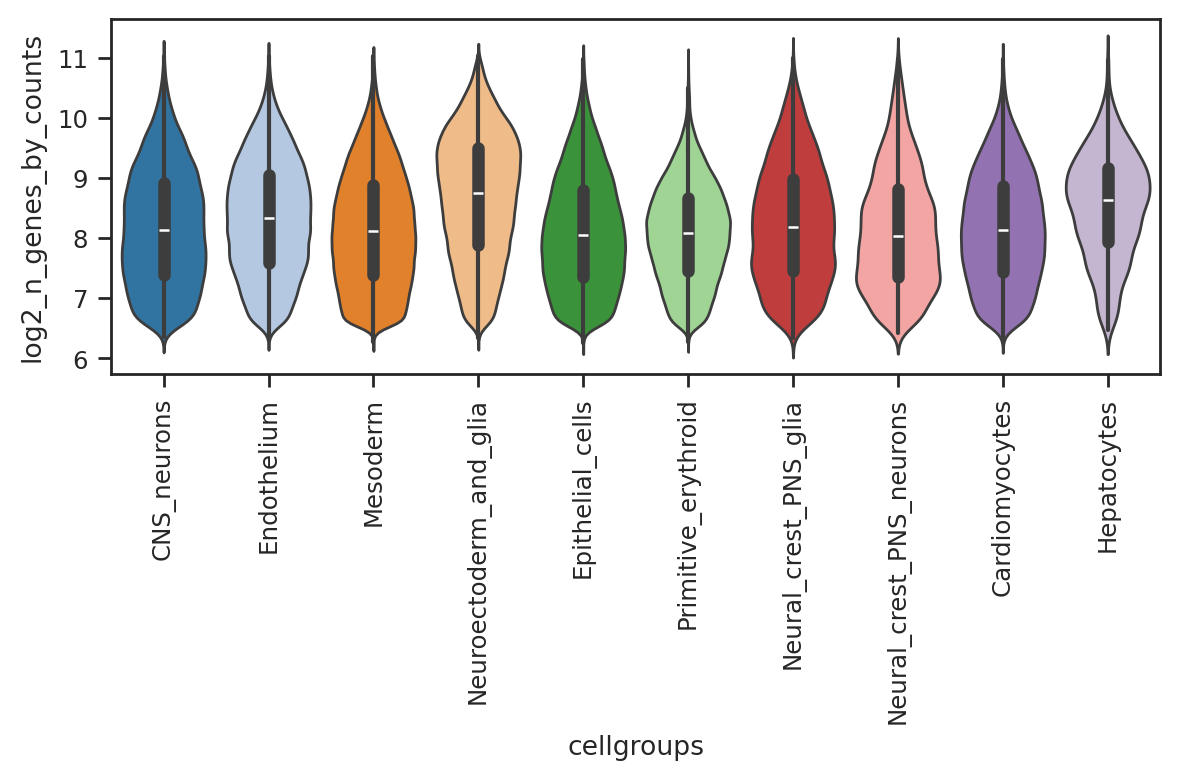

In [10]:
metric = "n_genes_by_counts"
metric_data = pd.DataFrame(columns=[metric, f"log2_{metric}", "cellgroups"])
for cg in E95_cellgroups:
    _data = E95_st_cells_data.loc[E95_st_cells_data['sc_ref_groups'] == cg, :]
    _data = pd.DataFrame(_data[metric].values, columns=[metric])
    _data[f"log2_{metric}"], _data["cellgroups"] = np.log2(_data[metric]), cg
    print(f"{cg}: {_data[metric].median()}")
    
    metric_data = pd.concat([metric_data, _data], axis=0)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.violinplot(metric_data, x="cellgroups", y=f"log2_{metric}", order=E95_cellgroups, ax=ax, palette=E95_groups_colors)
ax.tick_params(axis='x', labelrotation=90)
fig.tight_layout()
fig.show()

## Figure S1e- Comparison for mouse E11.5 whole embryo Stereo-seq datasets with the scRNA-seq reference. 

In [11]:
E115_groups_colors = {
    'Neuroectoderm_and_glia': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
    'Neural_crest_PNS_glia': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
    'Epithelial_cells': (1.0, 0.4980392156862745, 0.054901960784313725),
    'Mesoderm': (1.0, 0.7333333333333333, 0.47058823529411764),
    'CNS_neurons': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
    'Muscle_cells': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
    'White_blood_cells': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
    'Endothelium': (1.0, 0.596078431372549, 0.5882352941176471),
    'Definitive_erythroid': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
    'Intermediate_neuronal_progenitors': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
    'Primitive_erythroid': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
    'Hepatocytes': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
    'Ependymal_cells': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
    'Neural_crest_PNS_neurons': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
    'Cardiomyocytes': (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
    'Megakaryocytes': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
    'Lung_and_airway': (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
}
E115_cellgroups = [i for i in E115_groups_colors.keys()]

E115_sc_cells_data = pd.read_csv(f"/media/pc001/Yao/Projects/Project_spateo/mouse_embryo/E11.5_sc_image/mouse_E11.5_sc_final_cells_data.csv", index_col=0, sep="\t")
E115_sc_data = pd.DataFrame(E115_sc_cells_data["major_trajectory"].value_counts() / E115_sc_cells_data.shape[0]).loc[E115_cellgroups, :]
E115_sc_data.columns = ["fraction"]
E115_sc_data["cellgroups"] = E115_sc_data.index

E115_st_cells_data = pd.read_csv(f"/media/pc001/Yao/Projects/Project_spateo/mouse_embryo/E11.5_st_image/mouse_E11.5_st_final_cells_data.csv", index_col=0, sep="\t")
E115_st_data =  pd.DataFrame(E115_st_cells_data["sc_ref_groups"].value_counts() / E115_st_cells_data.shape[0]).loc[E115_cellgroups, :]
E115_st_data.columns = ["fraction"]
E115_st_data["cellgroups"] = E115_st_data.index
E115_sc_data, E115_st_data

(                                   fraction                         cellgroups
 Neuroectoderm_and_glia             0.245675             Neuroectoderm_and_glia
 Neural_crest_PNS_glia              0.016115              Neural_crest_PNS_glia
 Epithelial_cells                   0.032771                   Epithelial_cells
 Mesoderm                           0.451280                           Mesoderm
 CNS_neurons                        0.131583                        CNS_neurons
 Muscle_cells                       0.032761                       Muscle_cells
 White_blood_cells                  0.007091                  White_blood_cells
 Endothelium                        0.016642                        Endothelium
 Definitive_erythroid               0.021880               Definitive_erythroid
 Intermediate_neuronal_progenitors  0.002825  Intermediate_neuronal_progenitors
 Primitive_erythroid                0.013584                Primitive_erythroid
 Hepatocytes                        0.00

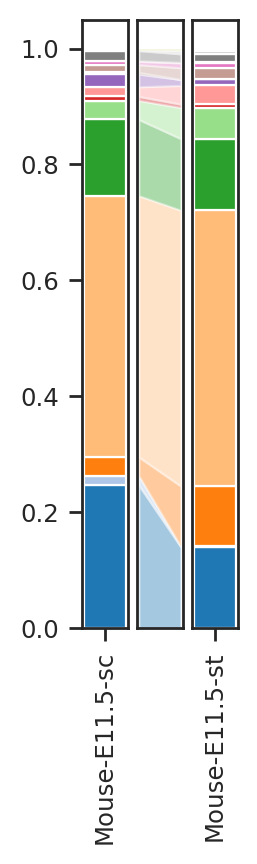

In [12]:
sns.set_theme(context="paper", style="ticks", font_scale=1)
fig, axes = plt.subplots(1, 3, figsize=(1, 4))

starts = 0
for i, ct in enumerate(E115_cellgroups):
    axes[0].bar(0, E115_sc_data.loc[ct, "fraction"], bottom=starts , width=1, color=E115_groups_colors[ct])
    starts = starts + E115_sc_data.loc[ct, "fraction"]
axes[0].set_xticks([0], ["Mouse-E11.5-sc"])
axes[0].tick_params(axis='x', labelrotation=90)

population_by_continent = {cg: [E115_sc_data.loc[cg, "fraction"], E115_st_data.loc[cg, "fraction"]] for cg in E115_cellgroups}
axes[1].stackplot([-0.5, 0.5], population_by_continent.values(),labels=population_by_continent.keys(), alpha=0.4, colors=[E115_groups_colors[i] for i in population_by_continent.keys()])
axes[1].set_xticks([])
axes[1].tick_params(axis='x', labelrotation=90)
axes[1].set_yticks([])

starts = 0
for i, ct in enumerate(E115_cellgroups):
    axes[2].bar(0, E115_st_data.loc[ct, "fraction"], bottom=starts, width=1, color=E115_groups_colors[ct])
    starts = starts + E115_st_data.loc[ct, "fraction"]
axes[2].set_xticks([0], ["Mouse-E11.5-st"])
axes[2].tick_params(axis='x', labelrotation=90)
axes[2].set_yticks([])
fig.show()

Neuroectoderm_and_glia: 1436.0
Neural_crest_PNS_glia: 1799.0
Epithelial_cells: 1638.0
Mesoderm: 1537.0
CNS_neurons: 1368.0
Muscle_cells: 1762.0
White_blood_cells: 1552.0
Endothelium: 1890.0
Definitive_erythroid: 1468.0
Intermediate_neuronal_progenitors: 1285.0
Primitive_erythroid: 778.0
Hepatocytes: 1883.0
Ependymal_cells: 1720.0
Neural_crest_PNS_neurons: 1882.0
Cardiomyocytes: 2038.0
Megakaryocytes: 1536.5
Lung_and_airway: 2046.0


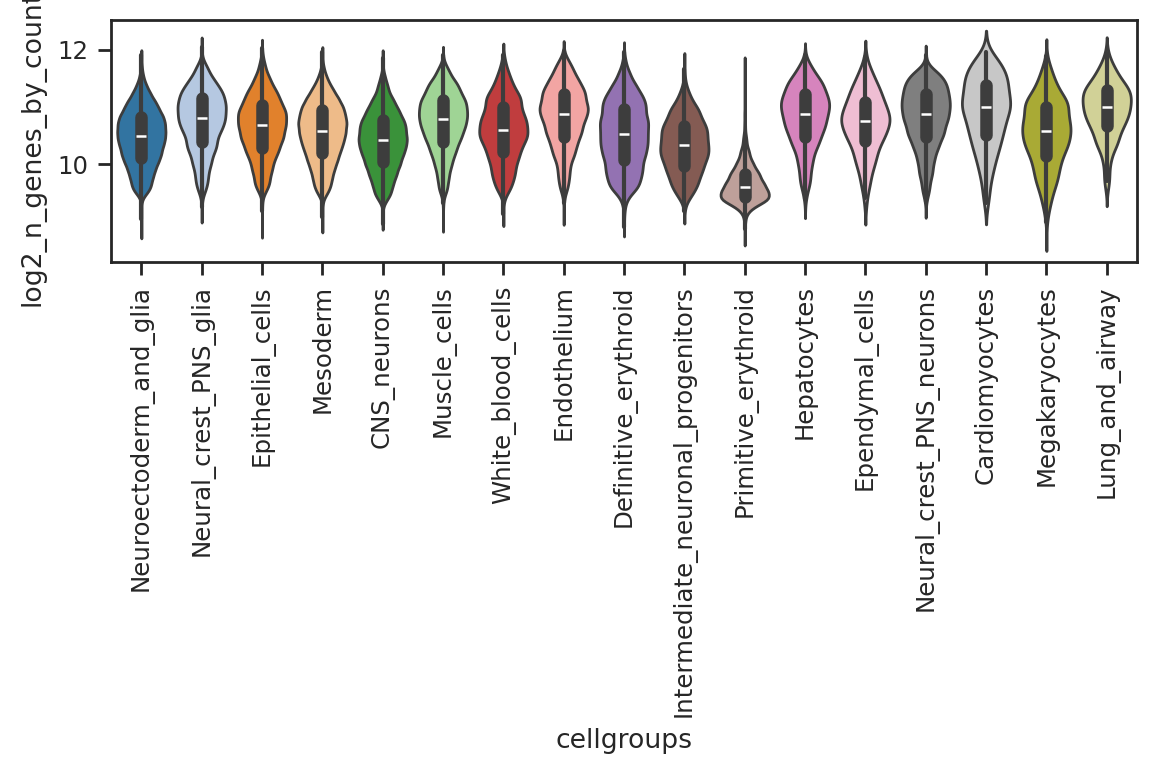

In [13]:
metric = "n_genes_by_counts"
metric_data = pd.DataFrame(columns=[metric, f"log2_{metric}", "cellgroups"])
for cg in E115_cellgroups:
    _data = E115_sc_cells_data.loc[E115_sc_cells_data['major_trajectory'] == cg, :]
    _data = pd.DataFrame(_data[metric].values, columns=[metric])
    _data[f"log2_{metric}"], _data["cellgroups"] = np.log2(_data[metric]), cg
    print(f"{cg}: {_data[metric].median()}")
    
    metric_data = pd.concat([metric_data, _data], axis=0)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.violinplot(metric_data, x="cellgroups", y=f"log2_{metric}", order=E115_cellgroups, ax=ax, palette=E115_groups_colors)
ax.tick_params(axis='x', labelrotation=90)
fig.tight_layout()
fig.show()

Neuroectoderm_and_glia: 316.0
Neural_crest_PNS_glia: 492.0
Epithelial_cells: 208.0
Mesoderm: 219.0
CNS_neurons: 264.0
Muscle_cells: 240.0
White_blood_cells: 252.0
Endothelium: 229.0
Definitive_erythroid: 188.0
Intermediate_neuronal_progenitors: 494.0
Primitive_erythroid: 220.0
Hepatocytes: 195.0
Ependymal_cells: 257.0
Neural_crest_PNS_neurons: 289.0
Cardiomyocytes: 590.0
Megakaryocytes: 237.0
Lung_and_airway: 200.0


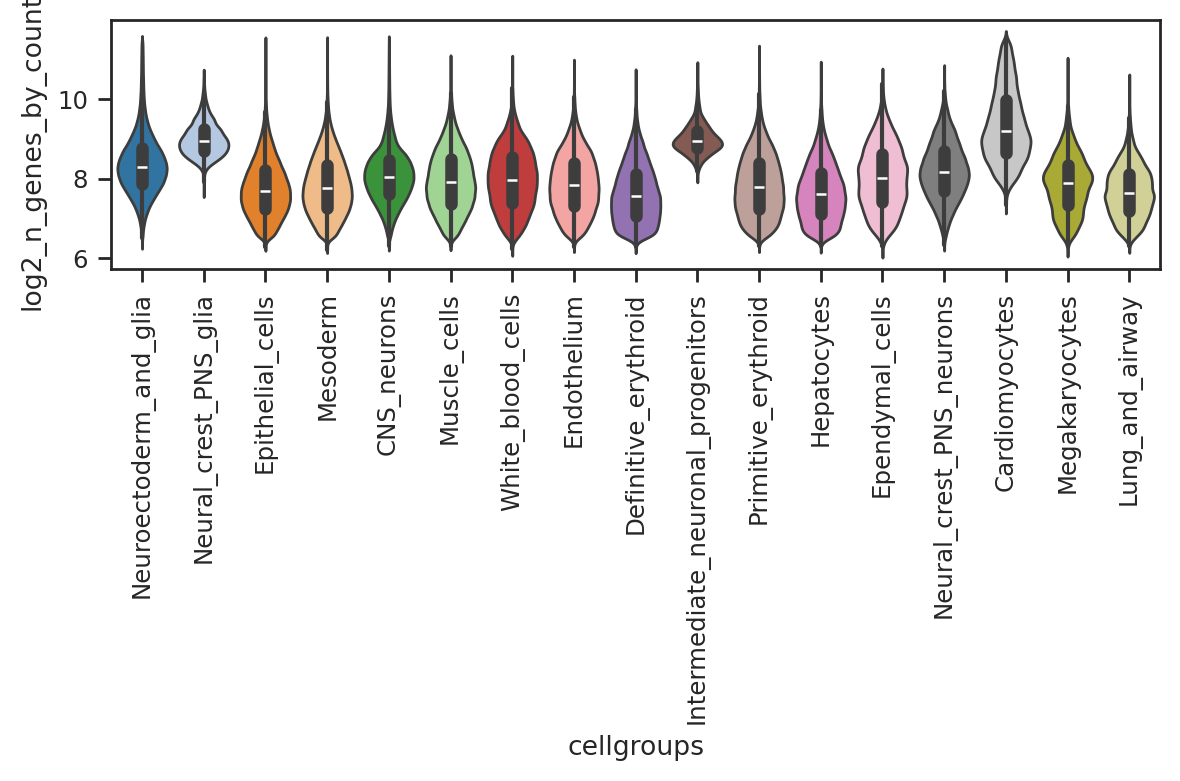

In [14]:
metric = "n_genes_by_counts"
metric_data = pd.DataFrame(columns=[metric, f"log2_{metric}", "cellgroups"])
for cg in E115_cellgroups:
    _data = E115_st_cells_data.loc[E115_st_cells_data['sc_ref_groups'] == cg, :]
    _data = pd.DataFrame(_data[metric].values, columns=[metric])
    _data[f"log2_{metric}"], _data["cellgroups"] = np.log2(_data[metric]), cg
    print(f"{cg}: {_data[metric].median()}")
    
    metric_data = pd.concat([metric_data, _data], axis=0)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.violinplot(metric_data, x="cellgroups", y=f"log2_{metric}", order=E115_cellgroups, ax=ax, palette=E115_groups_colors)
ax.tick_params(axis='x', labelrotation=90)
fig.tight_layout()
fig.show()

## Figure S1f- 3D visualization of selected cell groups and the corresponding marker gene expressions

In [16]:
available_cts_E95= {
    "Amniotic ectoderm": "Amniotic ectoderm",
    "Anterior floor plate": "Anterior floor plate",
    "Anterior intermediate mesoderm": "Anterior intermediate mesoderm",
    "Anterior roof plate": "Anterior roof plate",
    "Arterial endothelial cells": "Arterial endothelial cells",
    "Cardiopharyngeal mesoderm": "Cardiopharyngeal mesoderm",
    "Cranial mesoderm": "Sclerotome",
    "Cranial motor neurons": "Cranial motor neurons",
    "Dermomyotome": "Dermomyotome",
    "Diencephalon neuroectoderm": "Diencephalon",
    "Dorsal telencephalon neuroectoderm": "Dorsal telencephalon",
    "Ectoderm-derived": "Placodal area",
    "Endocardial cells": "Endocardial cells",
    "Endothelium": "Endothelium",
    "Epithelial precursors": "Pre-epidermal keratinocytes",
    "Glutamatergic neurons": "Glutamatergic neurons",
    "Gut": "Gut",
    "Gut mesenchyme": "Gut mesenchyme",
    "Head and facial mesenchyme": "Facial mesenchyme",
    "Hematoendothelial progenitors": "Hematoendothelial progenitors",
    "Hepatic mesenchyme": "Hepatic mesenchyme",
    "Hepatocytes": "Hepatocytes",
    "Hindbrain neuroectoderm": "Hindbrain",
    "Hypothalamus neuroectoderm": "Hypothalamus",
    "Hypothalamus (Sim1+) neuroectoderm": "Hypothalamus (Sim1+)",
    "Intermediate mesoderm": "Posterior intermediate mesoderm",
    "Lateral plate mesoderm": "Lateral plate and intermediate mesoderm",
    "Limb progenitors and lateral plate mesoderm": "Limb mesenchyme progenitors",
    "Liver sinusoidal endothelial cell precursors": "Endothelium",
    "LV/atrioventricular canal/common atrium cardiomyocytes": "First heart field",
    "Mesodermal progenitors": "Mesodermal progenitors (Tbx6+)",
    "Midbrain neuroectoderm": "Midbrain",
    "Midbrain-hindbrain boundary": "Midbrain-hindbrain boundary",
    "Neural crest (PNS glia)": "Neural crest (PNS glia)",
    "Neural crest (PNS neurons)": "Neural crest (PNS neurons)",
    "Neural progenitor cells": "Neural progenitor cells (Neurod1+)",
    "Neuroectoderm-derived": "Neural progenitor cells (Neurod1+)",
    "NMPs and spinal cord progenitors": "NMPs and spinal cord progenitors",
    "Olfactory epithelial cells": "Olfactory epithelial cells",
    "Otic epithelial cells": "Otic epithelial cells",
    "Placode and neural crest-derived": "Placodal area",
    "Posterior roof plate": "Posterior roof plate",
    "Primitive erythroid cells": "Primitive erythroid cells",
    "Proepicardium": "Proepicardium",
    "Renal mesenchyme": "Renal pericytes and mesangial cells",
    "Sclerotome": "Sclerotome",
    "Second heart field-derived cardiomyocytes": "Second heart field",
    "Spinal cord dorsal progenitors": "Spinal cord dorsal progenitors",
    "Spinal cord motor neurons": "Spinal cord motor neurons",
    "Spinal cord neuroectoderm": "Spinal cord/r7/r8",
    "Spinal cord ventral progenitors": "Spinal cord ventral progenitors",
    "Telencephalon neuroectoderm": "Telencephalon",
    "Vessel endothelial cells": "Brain capillary endothelial cells"
}

In [17]:
E95_mesh = st.tdr.read_model(f"/media/pc001/Yao/Projects/Project_spateo/mouse_embryo/Mouse_E95/mesh_models/0_Embryo_mouse_E95_mesh_model.vtk")

E95_adata = ad.read(f"/media/pc001/Yao/Projects/Project_spateo/mouse_embryo/h5ad/mouse_E9.5_st_final.h5ad")
E95_adata = E95_adata[E95_adata.obs['mapped_celltype'].isin([ct for ct in available_cts_E95.keys()])]
E95_adata.obs['sc_ref_cts'] = E95_adata.obs['mapped_celltype'].map(lambda x: available_cts_E95[str(x)])

sc_cell_data = pd.read_csv(f"/media/pc001/Yao/Projects/Project_spateo/mouse_embryo/E9.5_sc_image/mouse_E9.5_sc_final_cells_data.csv", index_col=0, sep="\t")
sc_cell_cts = pd.DataFrame(sc_cell_data.loc[:, ['major_trajectory', 'celltype_Spateo_match']])
sc_cell_cts.drop_duplicates(keep='first', inplace=True)
sc_groups = {sc_cell_cts.loc[i, 'celltype_Spateo_match']: sc_cell_cts.loc[i, 'major_trajectory'] for i in sc_cell_cts.index}
E95_adata.obs['sc_ref_groups'] = E95_adata.obs['sc_ref_cts'].map(lambda x: sc_groups[str(x)])

import scanpy as sc
sc.pp.highly_variable_genes(E95_adata, flavor='seurat_v3', n_top_genes=2000)
E95_adata = E95_adata[:, E95_adata.var['highly_variable']]
E95_adata = E95_adata[E95_adata.X.sum(axis=1) != 0, E95_adata.X.sum(axis=0) != 0]
sc.pp.normalize_total(E95_adata, target_sum=1e5)
sc.pp.log1p(E95_adata)
E95_adata

AnnData object with n_obs × n_vars = 884110 × 2000
    obs: 'area', 'louvain', 'cellbin_SpatialDomain', 'mapped_celltype', 'n_genes_by_counts', 'total_counts', 'sc_ref_cts', 'sc_ref_groups'
    var: 'n_cells_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p'
    obsm: 'spatial'

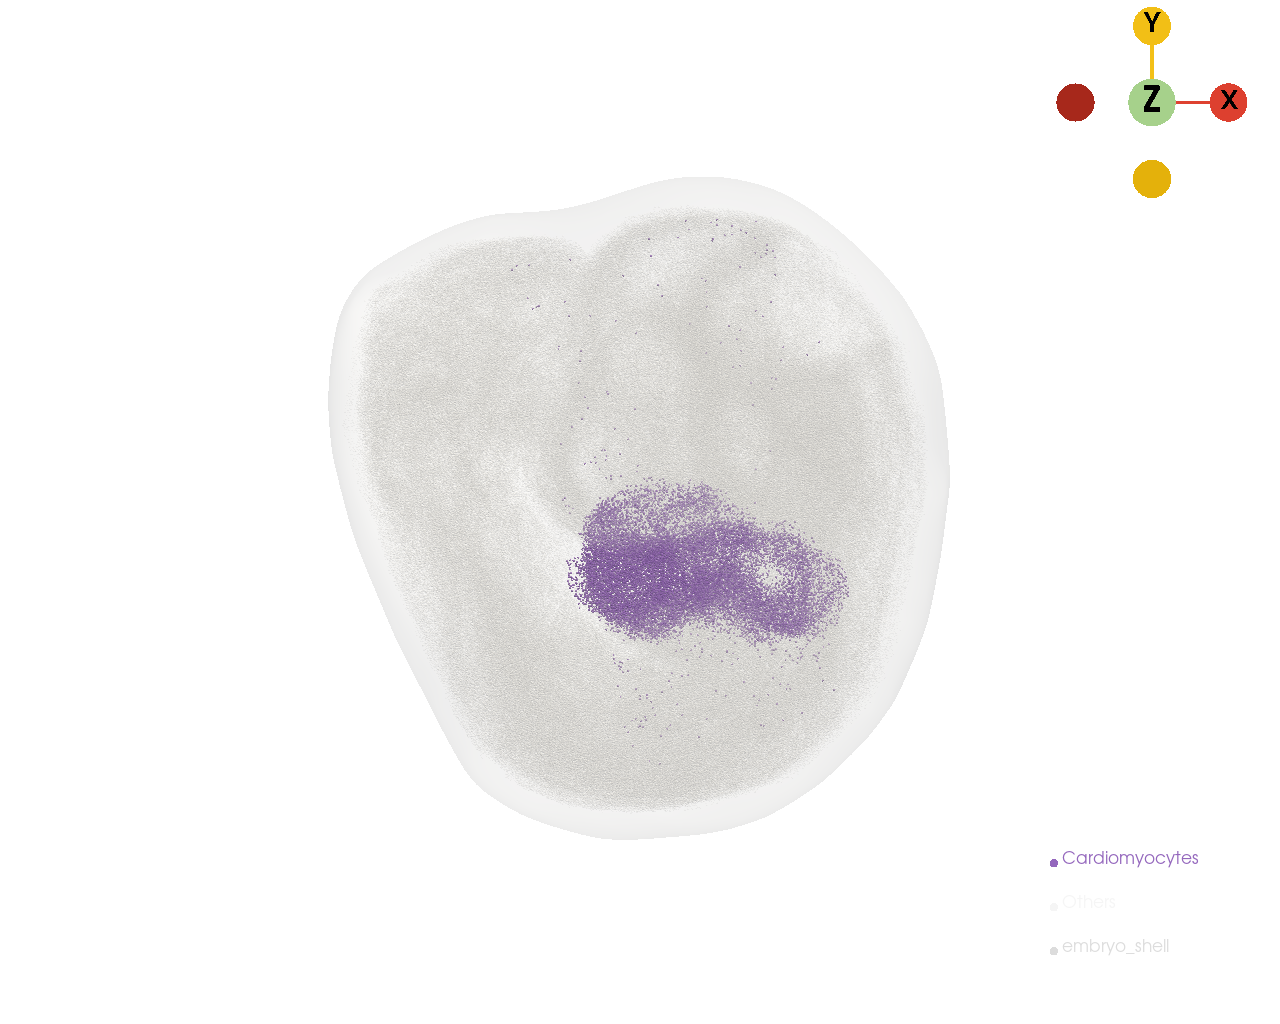

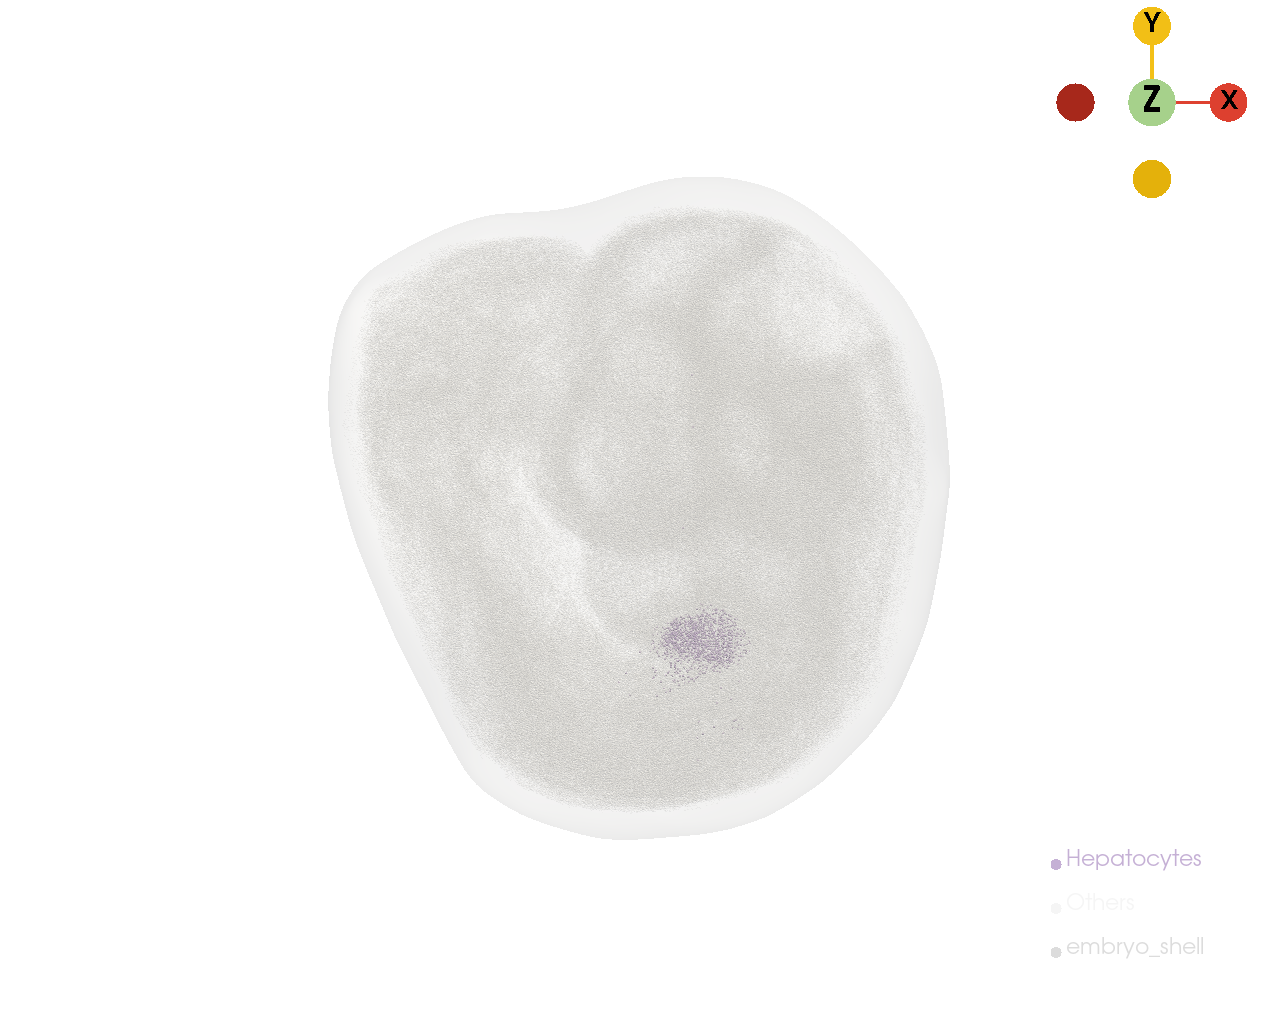

In [20]:
selected_cgs = ['Cardiomyocytes', 'Hepatocytes']
selected_cgs_colors = {'Cardiomyocytes': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
    'Hepatocytes': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589), 'Others': 'whitesmoke'}
selected_cgs_alphas = {'Cardiomyocytes': 1, 'Hepatocytes': 1, 'Others': 0.1}
for cg in selected_cgs:
    E95_adata.obs[f'cgs_{cg}'] = E95_adata.obs['sc_ref_groups'].map(lambda x: x if x in [cg] else 'Others')
    E95_pc, _ = st.tdr.construct_pc(adata=E95_adata, spatial_key='spatial',groupby=f'cgs_{cg}',key_added=f'cgs_{cg}', colormap=selected_cgs_colors, alphamap=selected_cgs_alphas)
    _ = st.pl.three_d_plot(
            model=st.tdr.collect_models([E95_pc, E95_mesh]),
            key=[f'cgs_{cg}', 'mapped_celltype'],
            model_style=["points", "surface"],
            model_size=2,
            opacity=[1, 0.3],
            colormap=None,
            show_legend=True,
            jupyter="static",
            cpo="xy",
            window_size=(1280, 1024),
        )

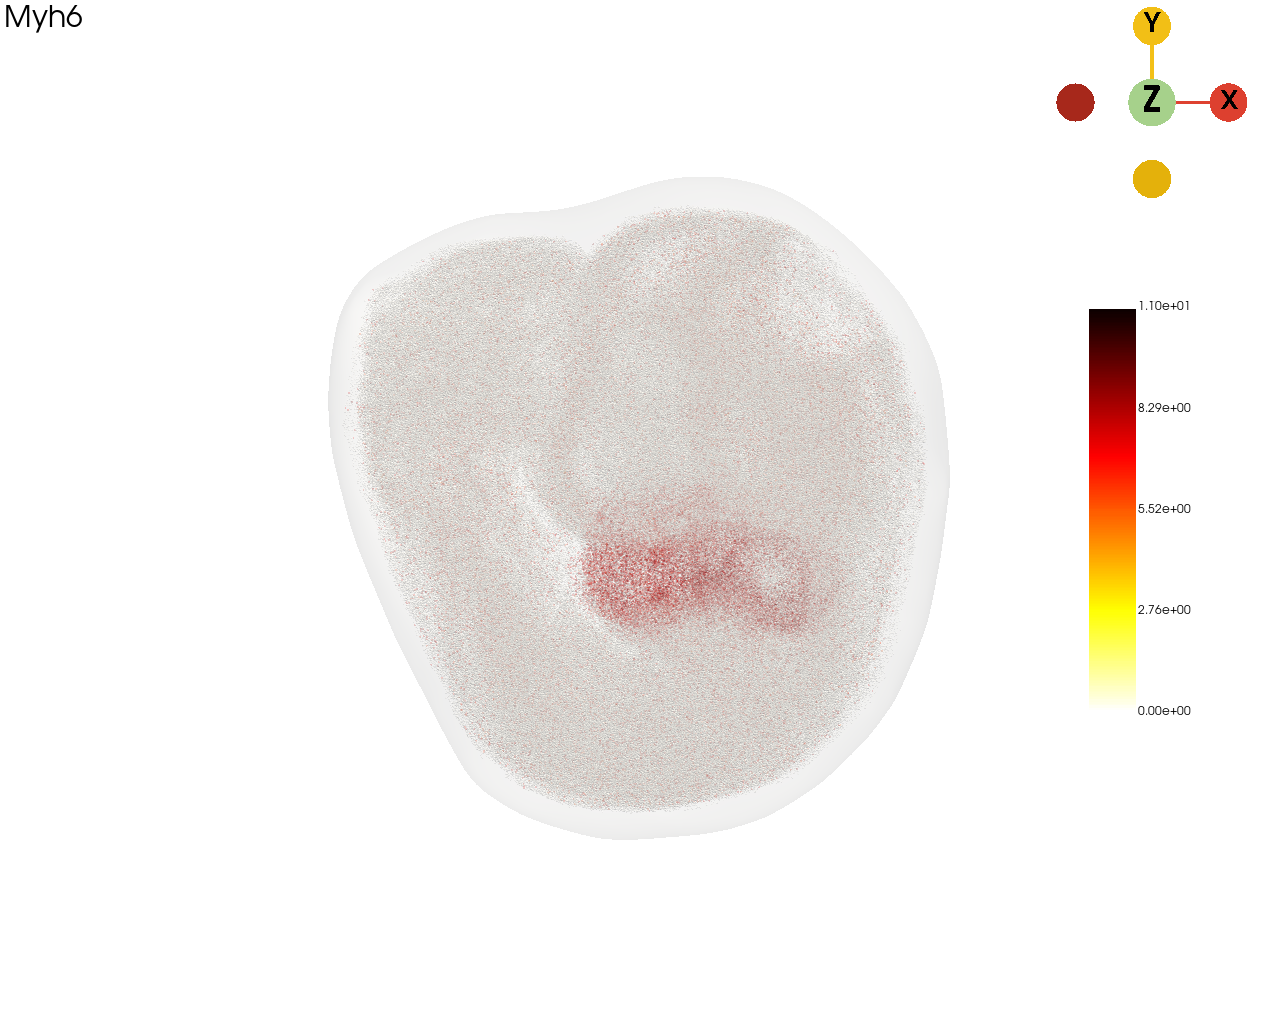

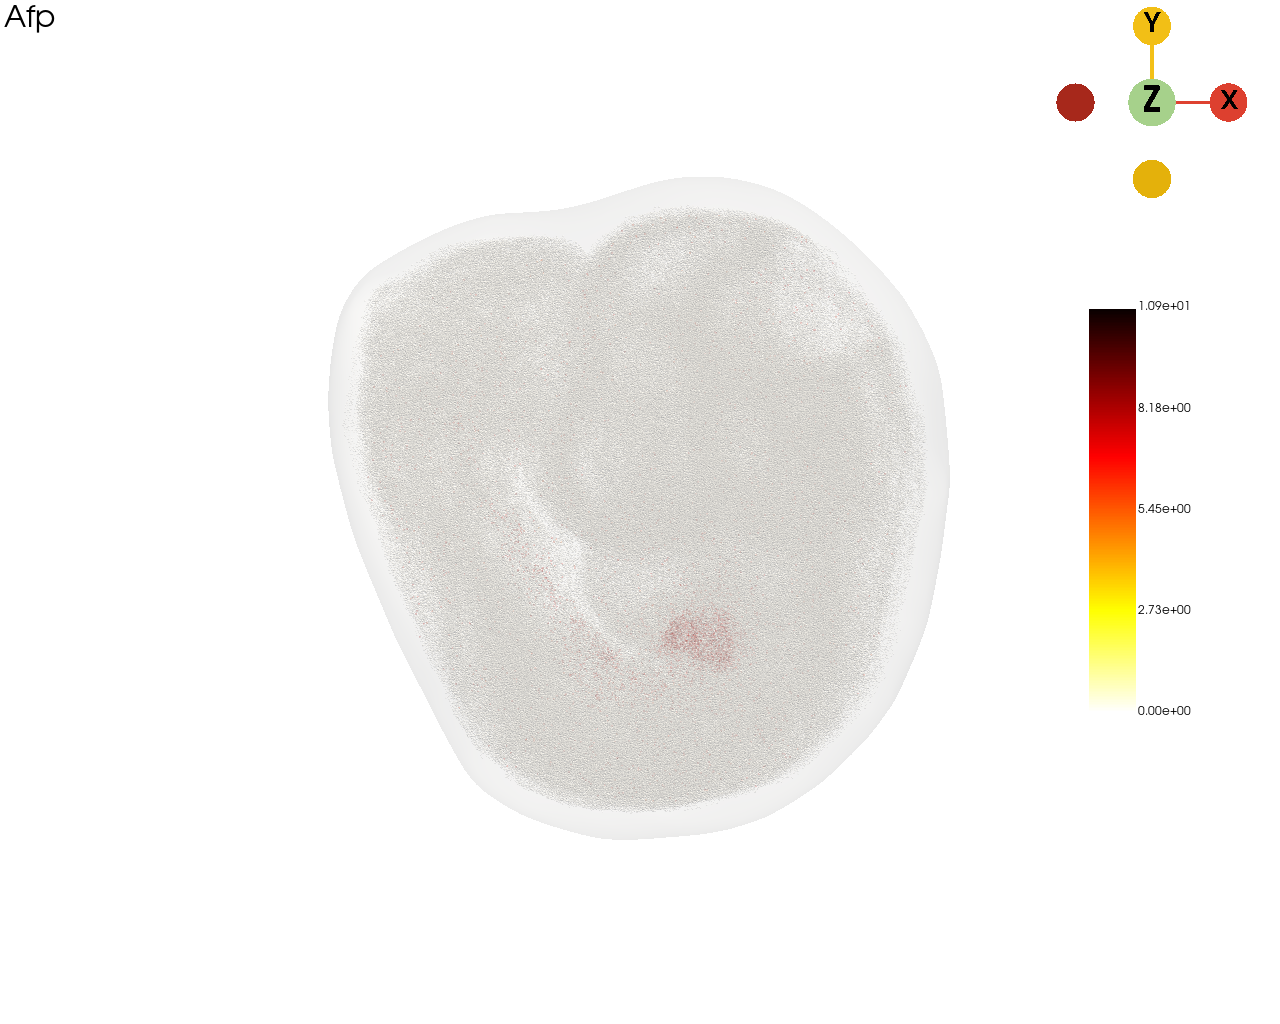

In [21]:
selected_genes = ['Myh6', 'Afp']
for gene in selected_genes:
    E95_adata.obs[f'cgs_{gene}'] = E95_adata[:, gene].X.A.flatten()
    E95_pc, _ = st.tdr.construct_pc(adata=E95_adata, spatial_key='spatial',groupby=f'cgs_{gene}',key_added=f'cgs_{gene}')
    _ = st.pl.three_d_plot(
            model=st.tdr.collect_models([E95_mesh, E95_pc]),
            key=['mapped_celltype', f'cgs_{gene}'],
            model_style=["surface", "points"],
            model_size=2,
            opacity=[0.3, 0.2],
            colormap=[None, 'hot_r'],
            show_legend=True,
            jupyter="static",
            cpo="xy",
            text=gene,
            window_size=(1280, 1024),
        )

In [23]:
available_cts_E115 = {
    "Anterior floor plate": "Anterior floor plate",
    "Anterior roof plate": "Anterior roof plate",
    "Apical ectodermal ridge": "Apical ectodermal ridge",
    "Arterial endothelial cells": "Arterial endothelial cells",
    "Astrocytes": "Astrocytes",
    "Atrial cardiomyocytes": "First heart field",
    "Border-associated macrophages": "Border-associated macrophages",
    "Branchial arch epithelium": "Branchial arch epithelium",
    "CNS capillary endothelial cells": "Brain capillary endothelial cells",
    "Cajal-Retzius cells": "Cajal-Retzius cells",
    "Cardiac fibroblasts": "Fibroblasts",
    "Cardiac mesoderm": "Cardiopharyngeal mesoderm",
    "Chondrocytes": "Chondrocytes (Atp1a2+)",
    "Choroid plexus epithelial precursors": "Choroid plexus",
    "Cranial mesoderm": "Sclerotome",
    "Cranial motor neurons": "Cranial motor neurons",
    "Definitive early erythroblasts": "Definitive early erythroblasts (CD36-)",
    "Dermatome": "Dermatome",
    "Dermomyotome": "Dermomyotome",
    "Diencephalon neuroectoderm": "Diencephalon",
    "Dorsal telencephalon neuroectoderm": "Dorsal telencephalon",
    "Early chondrocytes": "Early chondrocytes",
    "Ectoderm-derived": "Placodal area",
    "Endocardial cells": "Endocardial cells",
    "Endothelium": "Endothelium",
    "Enteric neurons": "Enteric neurons",
    "Epithelial precursors": "Pre-epidermal keratinocytes",
    "Eye field": "Eye field",
    "Facial mesenchyme": "Facial mesenchyme",
    "Fibroblasts": "Fibroblasts",
    "Floorplate and p3 domain": "Floorplate and p3 domain",
    "GABAergic interneurons": "GABAergic cortical interneurons",
    "GABAergic neurons": "GABAergic neurons",
    "Glutamatergic neurons": "Glutamatergic neurons",
    "Gut": "Gut",
    "Gut mesenchyme": "Gut mesenchyme",
    "Hematopoietic progenitors": "Hematopoietic stem cells (Cd34+)",
    "Hepatic mesenchyme": "Hepatic mesenchyme",
    "Hepatocytes": "Hepatocytes",
    "Hindbrain neuroectoderm": "Hindbrain",
    "Hypothalamus (Sim1+) neuroectoderm": "Hypothalamus (Sim1+)",
    "Hypothalamus neuroectoderm": "Hypothalamus",
    "Intermediate neuronal progenitors": "Intermediate neuronal progenitors",
    "Kupffer cells": "Kupffer cells",
    "Lateral plate and intermediate mesoderm": "Splanchnic mesoderm",
    "Limb progenitors and lateral plate mesenchyme": "Limb mesenchyme progenitors",
    "Liver sinusoidal endothelial cells": "Liver sinusoidal endothelial cells",
    "Lung mesenchyme": "Lung mesenchyme",
    "Lung progenitor cells": "Lung progenitor cells",
    "Lymphatic vessel endothelial cells": "Lymphatic vessel endothelial cells",
    "Megakaryocytes": "Megakaryocytes",
    "Mesoderm-derived": "Somatic mesoderm",
    "Mesodermal progenitors": "Mesodermal progenitors (Tbx6+)",
    "Metanephric mesenchyme": "Metanephric mesenchyme",
    "Microglia": "Microglia",
    "Midbrain neuroectoderm": "Midbrain",
    "Midbrain-hindbrain boundary": "Midbrain-hindbrain boundary",
    "Muscle progenitor cells": "Muscle progenitor cells",
    "Myelinating Schwann cells": "Myelinating Schwann cells",
    "Myoblasts": "Myoblasts",
    "Myofibroblasts": "Myofibroblasts",
    "Myotubes": "Myotubes",
    "NMPs and spinal cord progenitors": "NMPs and spinal cord progenitors",
    "Neural crest (PNS glia)": "Neural crest (PNS glia)",
    "Neural crest (PNS neurons)": "Neural crest (PNS neurons)",
    "Neural progenitors": "Neural progenitor cells (Neurod1+)",
    "Neuroectoderm-derived": "Telencephalon",
    "Olfactory epithelial cells": "Olfactory epithelial cells",
    "Otic epithelial cells": "Otic epithelial cells",
    "Otic sensory neurons": "Otic sensory neurons",
    "Outflow tract cardiomyocytes": "First heart field",
    "Pituitary and Pineal gland progenitors": "Pituitary/Pineal gland progenitors",
    "Placode and neural crest-derived": "Placodal area",
    "Posterior roof plate": "Posterior roof plate",
    "Primitive erythroid cells": "Primitive erythroid cells",
    "Proepicardium": "Proepicardium",
    "Renal mesenchyme": "Metanephric mesenchyme",
    "Sclerotome": "Sclerotome",
    "Skeletal muscle progenitors": "Muscle progenitor cells (Prdm1+)",
    "Somitic muscle progenitors": "Muscle progenitor cells (Prdm1+)",
    "Spinal V0/1 interneurons": "Spinal V0 interneurons",
    "Spinal V2/3 interneurons": "Spinal V2a interneurons",
    "Spinal cord dorsal progenitors": "Spinal cord dorsal progenitors",
    "Spinal cord motor neurons": "Spinal cord motor neurons",
    "Spinal cord neuroectoderm": "Spinal cord/r7/r8",
    "Spinal cord ventral progenitors": "Spinal cord ventral progenitors",
    "Spinal dI1 interneurons": "Spinal dI1 interneurons",
    "Spinal dI2/3/4 interneurons": "Spinal dI2 interneurons",
    "Spinal dI5/6 interneurons": "Spinal dI5 interneurons",
    "Sympathetic neurons": "Sympathetic neurons",
    "Telencephalon neuroectoderm": "Telencephalon",
    "Ureteric bud": "Ureteric bud",
    "Ventricular cardiomyocytes": "First heart field",
    "Zona limitans intrathalamica": "Thalamic neuronal precursors"
}

In [24]:
E115_mesh = st.tdr.read_model(f"/media/pc001/Yao/Projects/Project_spateo/mouse_embryo/Mouse_E115/mesh_models/0_Embryo_mouse_E115_mesh_model.vtk")

E115_adata = ad.read(f"/media/pc001/Yao/Projects/Project_spateo/mouse_embryo/h5ad/mouse_E11.5_st_final.h5ad")
E115_adata = E115_adata[E115_adata.obs['mapped_celltype'].isin([ct for ct in available_cts_E115.keys()])]
E115_adata.obs['sc_ref_cts'] = E115_adata.obs['mapped_celltype'].map(lambda x: available_cts_E115[str(x)])

sc_cell_data = pd.read_csv(f"/media/pc001/Yao/Projects/Project_spateo/mouse_embryo/E11.5_sc_image/mouse_E11.5_sc_final_cells_data.csv", index_col=0, sep="\t")
sc_cell_cts = pd.DataFrame(sc_cell_data.loc[:, ['major_trajectory', 'celltypes_Spateo_match']])
sc_cell_cts.drop_duplicates(keep='first', inplace=True)
sc_groups = {sc_cell_cts.loc[i, 'celltypes_Spateo_match']: sc_cell_cts.loc[i, 'major_trajectory'] for i in sc_cell_cts.index}
E115_adata.obs['sc_ref_groups'] = E115_adata.obs['sc_ref_cts'].map(lambda x: sc_groups[str(x)])

import scanpy as sc
sc.pp.highly_variable_genes(E115_adata, flavor='seurat_v3', n_top_genes=2000)
E115_adata = E115_adata[:, E115_adata.var['highly_variable']]
E115_adata = E115_adata[E115_adata.X.sum(axis=1) != 0, E115_adata.X.sum(axis=0) != 0]
sc.pp.normalize_total(E115_adata, target_sum=1e5)
sc.pp.log1p(E115_adata)
E115_adata

AnnData object with n_obs × n_vars = 6319732 × 2000
    obs: 'area', 'louvain', 'transf_anno', 'mapped_celltype', 'ManualAnnotation', 'slice_id', 'n_genes_by_counts', 'total_counts', 'sc_ref_cts', 'sc_ref_groups'
    var: 'n_cells_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p'
    obsm: 'spatial'

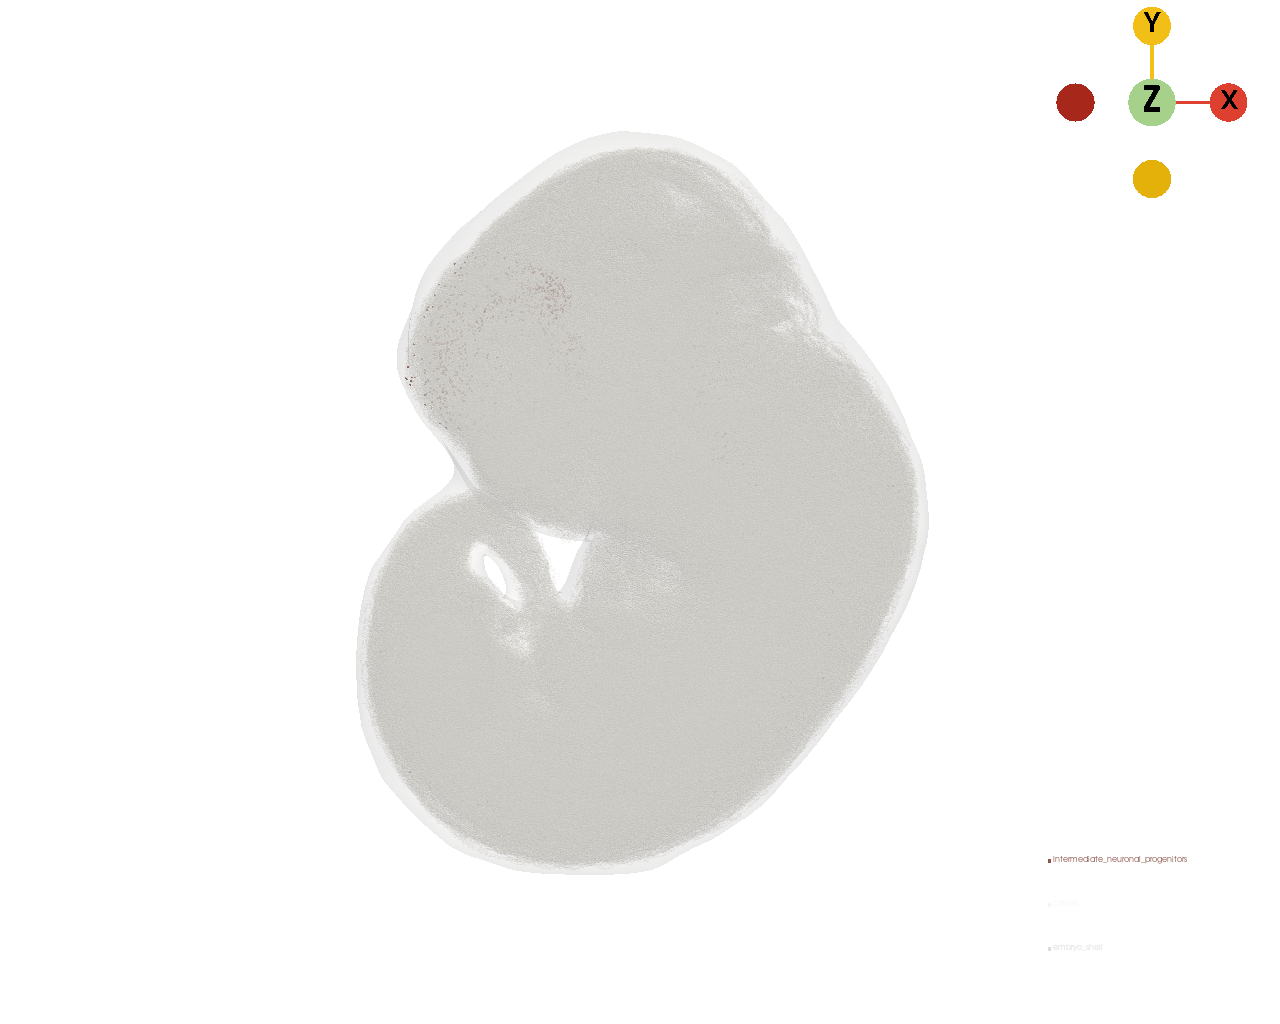

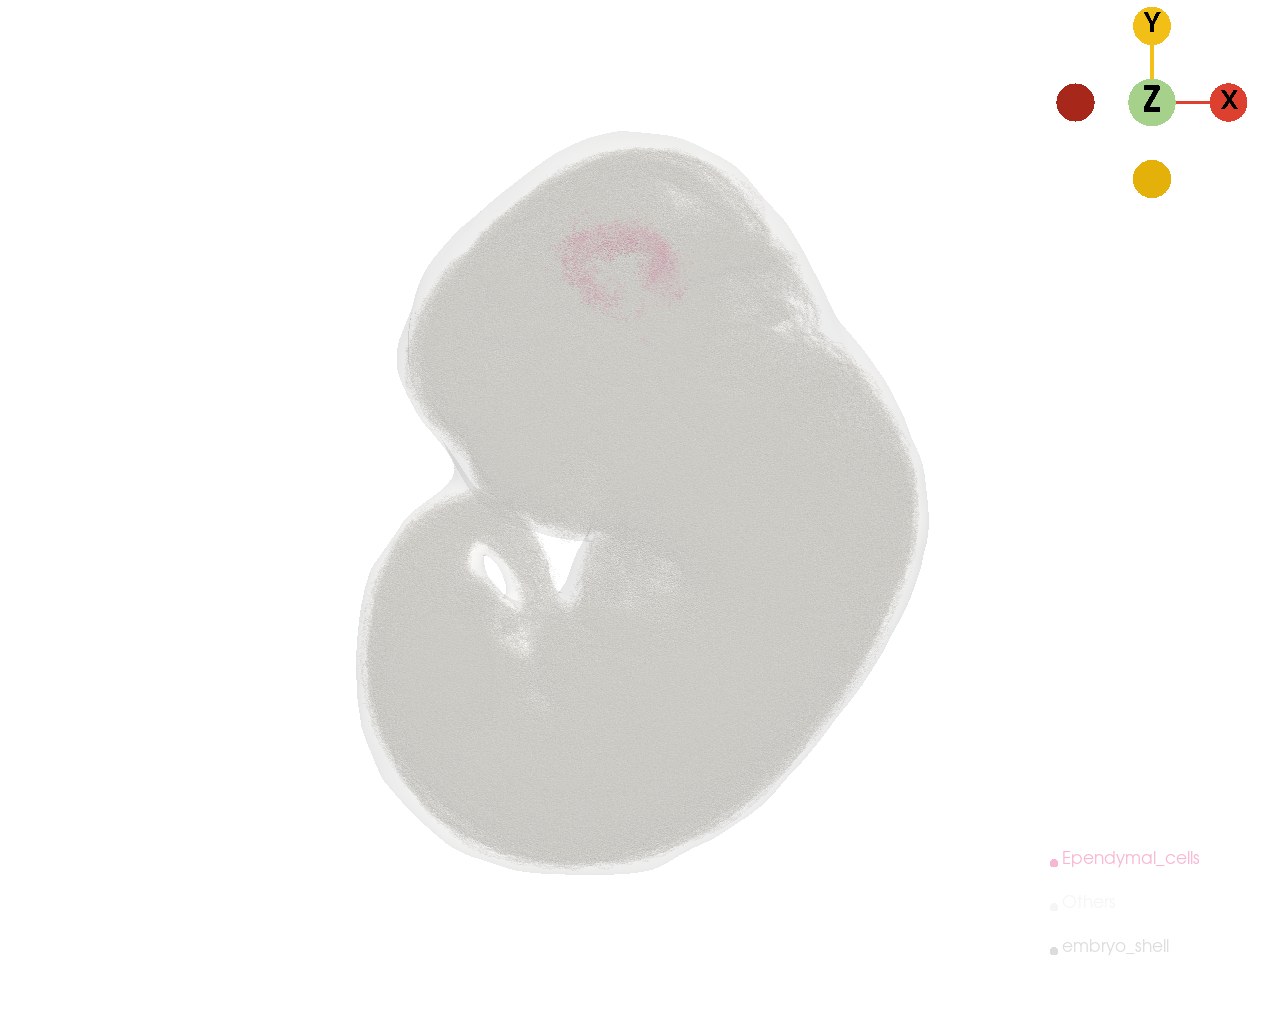

In [25]:
selected_cgs = ['Intermediate_neuronal_progenitors', 'Ependymal_cells']
selected_cgs_colors = {'Intermediate_neuronal_progenitors': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
    'Ependymal_cells': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058), 'Others': 'whitesmoke'}
selected_cgs_alphas = {'Intermediate_neuronal_progenitors': 1, 'Ependymal_cells': 1, 'Others': 0.1}
for cg in selected_cgs:
    E115_adata.obs[f'cgs_{cg}'] = E115_adata.obs['sc_ref_groups'].map(lambda x: x if x in [cg] else 'Others')
    E115_pc, _ = st.tdr.construct_pc(adata=E115_adata, spatial_key='spatial',groupby=f'cgs_{cg}',key_added=f'cgs_{cg}', colormap=selected_cgs_colors, alphamap=selected_cgs_alphas)
    _ = st.pl.three_d_plot(
            model=st.tdr.collect_models([E115_pc, E115_mesh]),
            key=[f'cgs_{cg}', 'mapped_celltype'],
            model_style=["points", "surface"],
            model_size=2,
            opacity=[1, 0.1],
            colormap=None,
            show_legend=True,
            jupyter="static",
            cpo="xy",
            window_size=(1280, 1024),
        )

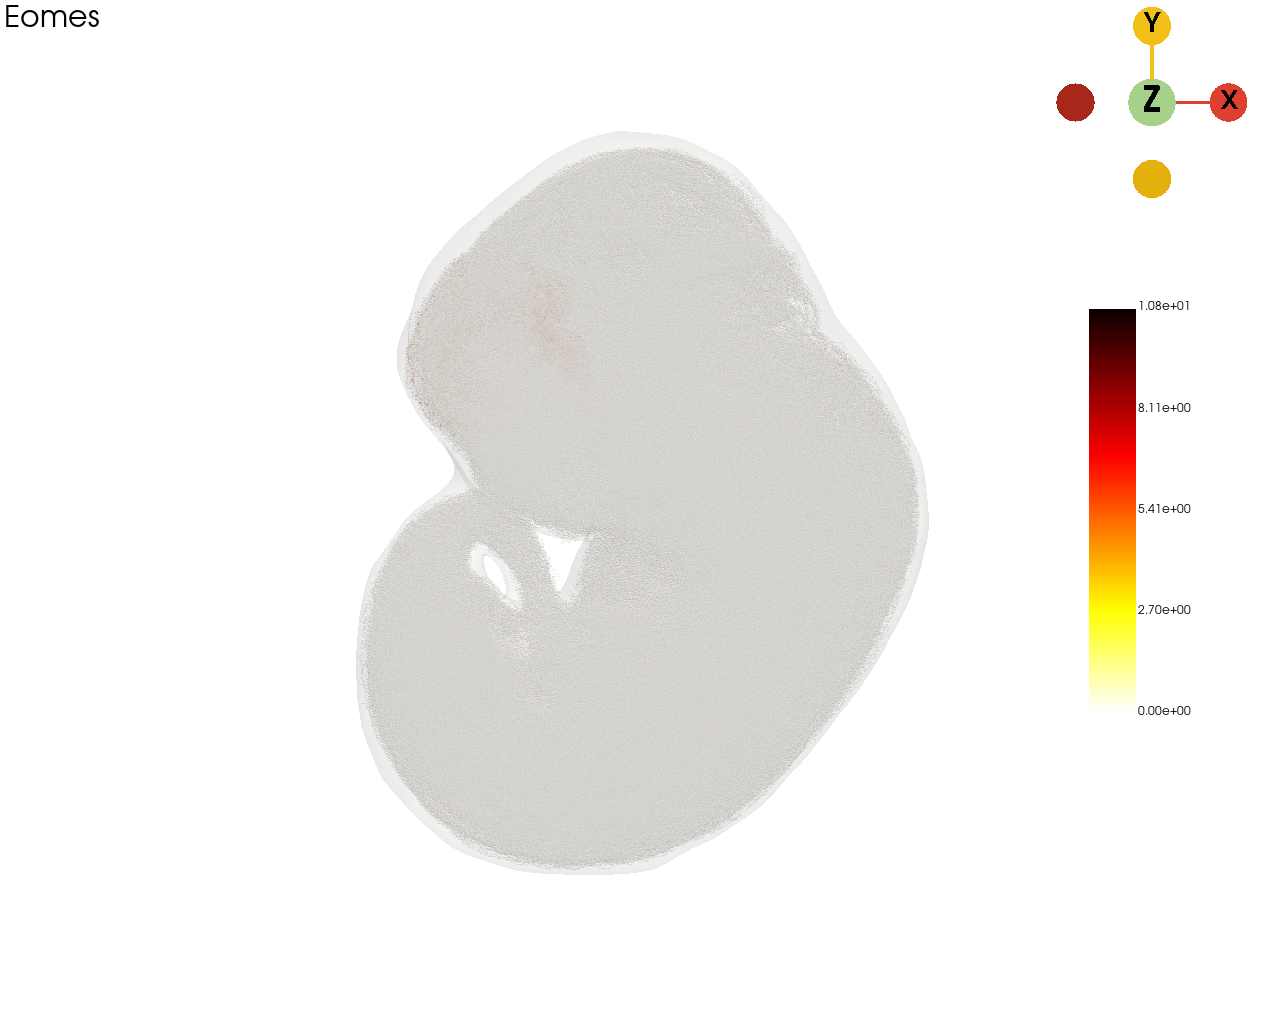

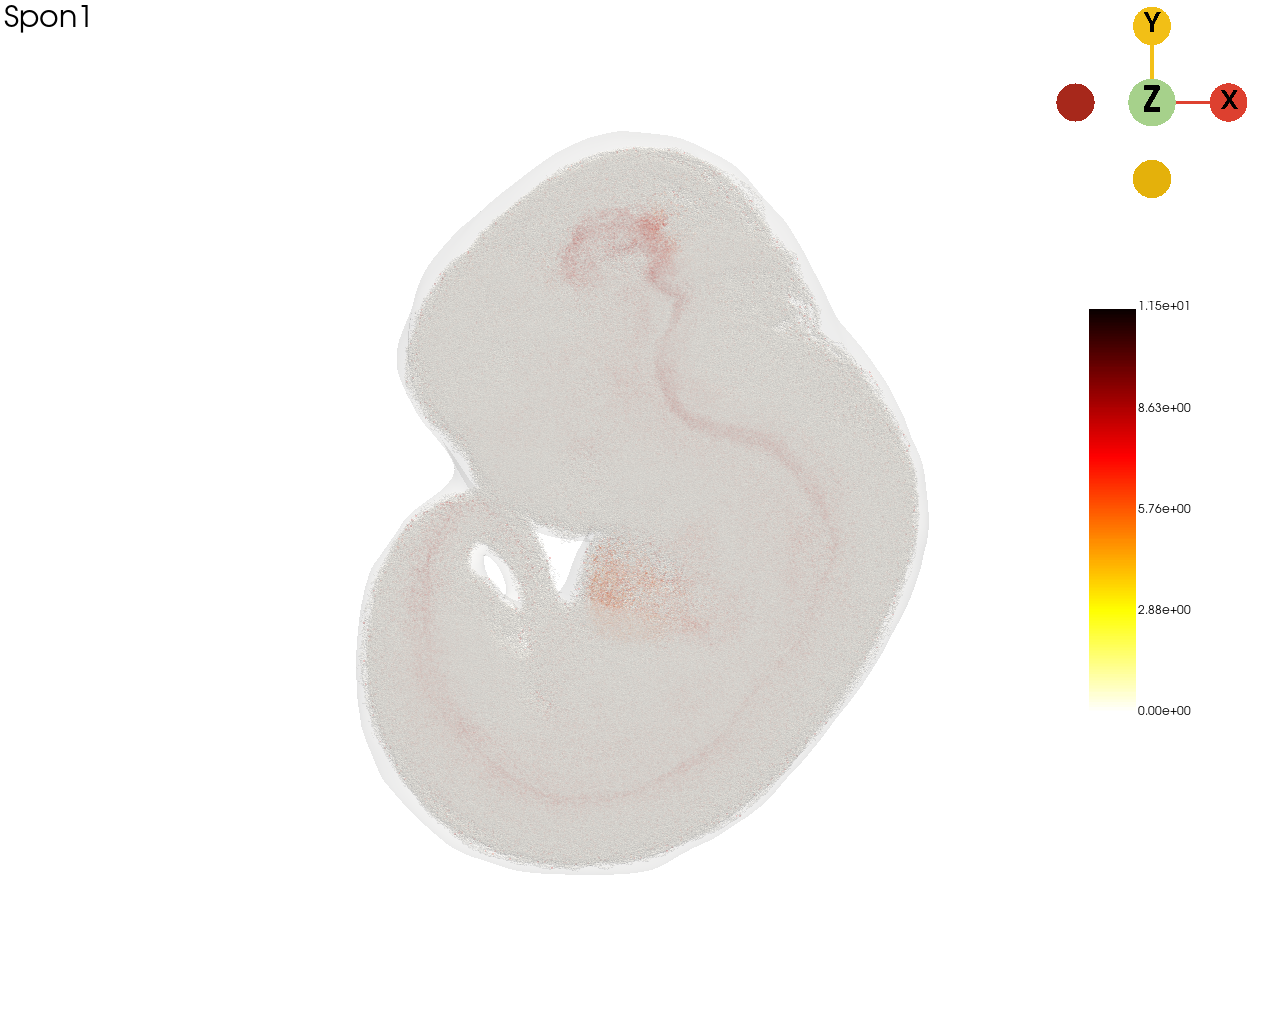

In [26]:
selected_genes = ['Eomes', 'Spon1']
for gene in selected_genes:
    E115_adata.obs[f'cgs_{gene}'] = E115_adata[:, gene].X.A.flatten()
    E115_pc, _ = st.tdr.construct_pc(adata=E115_adata, spatial_key='spatial',groupby=f'cgs_{gene}',key_added=f'cgs_{gene}')
    _ = st.pl.three_d_plot(
            model=st.tdr.collect_models([E115_mesh, E115_pc]),
            key=['mapped_celltype', f'cgs_{gene}'],
            model_style=["surface", "points"],
            model_size=2,
            opacity=[0.1, 0.2],
            colormap=[None, 'hot_r'],
            show_legend=True,
            jupyter="static",
            cpo="xy",
            text=gene,
            window_size=(1280, 1024),
        )